## Neural Networks with Fashion MNIST

<blockquote>Yasin İnal

<blockquote>
    
    In this notebook, a dataset which consists of 70,000 clothing image has been used. By using neural networks, my model is able to distinguish a clothing type from 10 different categories by 0.82 accuracy in the test set...
    
    To seperate the test data from train data, I've used the already prepared function of the dataset.

[1. Normalization to Increase Accuracy](#norm) <br>
[2. Training Process](#train) <br>
[3. Prediction of Test Images](#pred) <br>
[4. Accuracy Measurement on Test Images](#acc) <br>
[5. Confusion Matrix ](#conf) <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()


In [2]:
len(train_labels) + len(test_labels)

70000

In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<a id = "norm"></a>
## Normalization to increase accuracy

In [24]:
train_img_d = train_images/255.0
test_img_d = test_images/255.0

<a id = "train"></a>
## Training Process

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.9502 - accuracy: 0.6979
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6717 - accuracy: 0.7711
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5888 - accuracy: 0.7901
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5449 - accuracy: 0.8072
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5103 - accuracy: 0.8206
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5024 - accuracy: 0.8252
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4946 - accuracy: 0.8291
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4861 - accuracy: 0.8319
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.83 - 3s 1ms/step - loss: 0.4817 - accuracy: 0.8339
Epoch 10/10
1875/1875 [=================

<a id = "pred"></a>
## Prediction of Test Images

In [61]:
prediction = model.predict(test_images)

# print(class_names[np.argmax(prediction[0])])
pred_max = np.argmax(prediction, axis=1)
len(pred_max)

10000

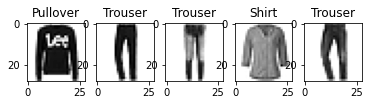

In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for x in range(1,6):

    plt.subplot(1,5,x)
    plt.imshow(test_img_d[x], cmap=plt.cm.binary)
    plt.title(class_names[pred_max[x]])
    
plt.show()

<a id = "acc"></a>
## Accuracy Measurement On Test Images

In [63]:
from sklearn.metrics import accuracy_score

score = accuracy_score(pred_max, test_labels)
score

0.8244

<a id = "conf"></a>
## Confusion Matrix

In [67]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(test_labels, pred_max)
conf_matrix

array([[854,   6,   5,  59,   1,   0,  70,   0,   5,   0],
       [  4, 949,   5,  32,   1,   0,   7,   0,   2,   0],
       [ 30,   2, 617,  10, 161,   0, 178,   0,   2,   0],
       [ 41,  13,   2, 856,  22,   0,  64,   0,   2,   0],
       [  0,   2,  75,  39, 772,   0, 109,   0,   3,   0],
       [  0,   0,   0,   0,   0, 880,  14,  35,  25,  46],
       [249,   1,  80,  41, 110,   0, 507,   0,  12,   0],
       [  0,   0,   0,   0,   0,  21,   4, 928,   3,  44],
       [ 12,   0,   1,   9,   3,   1,  52,   5, 917,   0],
       [  1,   0,   0,   0,   0,   5,   1,  28,   1, 964]], dtype=int64)

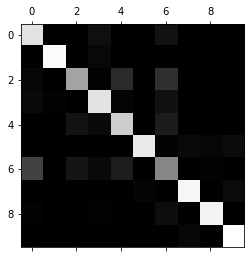

In [68]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

<blockquote>

    To see the errors better, I will fill the 'white' diagonal with 0.

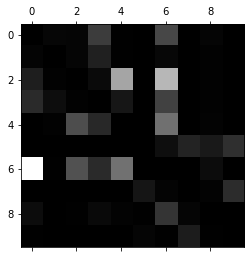

In [69]:
np.fill_diagonal(conf_matrix, 0)
plt.matshow(conf_matrix, cmap= plt.cm.gray)

In [70]:
class_names[6], class_names[0]

('Shirt', 'T-shirt/top')

<blockquote>

We can see that most of the Shirts are considered as T-Shirt. Since they are also very similar in real life (and even their name are almost the same :D) it may not be a huge problem for our example. 